In [1]:
import pandas as pd
import numpy as np

In [76]:
df = pd.read_csv('/home/nastyboget/Загрузки/Введение в анализ данных/hometask3/restaurants.csv', sep = ',')

In [5]:
df.head()

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
0,28957,20633,Архангельск,Супы,0.0,2.0,0.0
1,37381,27399,Архангельск,Пироги,0.0,0.0,0.0
2,28703,20431,Архангельск,Суши,111.0,3.0,0.0
3,37382,27399,Архангельск,Пироги,1.0,0.0,0.0
4,36877,27151,Архангельск,Бургеры,22.0,2.0,0.0


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 7 columns):
vendor_id            784 non-null int64
chain_id             784 non-null int64
city_name            784 non-null object
specialisation       784 non-null object
successful_orders    784 non-null float64
fail_orders          784 non-null float64
reorders             784 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 43.0+ KB
None


In [7]:
df.shape

(784, 7)

In [8]:
[(col, df[col].nunique()) for col in df.columns]

[('vendor_id', 784),
 ('chain_id', 693),
 ('city_name', 63),
 ('specialisation', 27),
 ('successful_orders', 284),
 ('fail_orders', 29),
 ('reorders', 30)]

In [17]:
df[(df.specialisation=='Рыба')].shape

(30, 7)

In [21]:
df['successful_orders'].mean()

115.34438775510205

In [42]:
minr = df.groupby(by = 'city_name')['reorders'].count()
minr[minr == 2]

city_name
Ханты-Мансийск    2
Name: reorders, dtype: int64

In [46]:
df[(df.fail_orders > 20.0) & (df.successful_orders < 500)]

,vendor_id,chain_id,city_name,specialisation,successful_orders,fail_orders,reorders
95,24121,16012,Волгоград,Пицца,445.0,24.0,25.0
145,33976,14915,Екатеринбург,Суши,327.0,46.0,65.0
372,22211,15120,Нижний Новгород,Суши,79.0,29.0,20.0
420,24126,16404,Орел,Пицца,482.0,33.0,27.0
656,25369,17762,Тула,Пицца,205.0,38.0,18.0


In [55]:
df[(df.specialisation == 'Выпечка')]['successful_orders'].mean()

12.8

In [66]:
new_df = df.groupby(by = 'specialisation')['successful_orders', 'fail_orders', 'reorders'].sum()
new_df['unsuc'] = new_df['fail_orders'] / (new_df['successful_orders'] + new_df['fail_orders'] + new_df['reorders'])
new_df['unsuc']

,successful_orders,fail_orders,reorders,unsuc
specialisation,,,,
Бургеры,4863.0,148.0,131.0,0.028783
Вегетарианское меню,12.0,7.0,4.0,0.304348
Выпечка,64.0,4.0,1.0,0.057971
Гирос,682.0,9.0,3.0,0.012968
Грузинская,191.0,5.0,1.0,0.025381
Десерты,41.0,6.0,3.0,0.120000
Индийская,76.0,8.0,2.0,0.093023
Итальянская,134.0,1.0,0.0,0.007407
Китайская,891.0,18.0,11.0,0.019565


In [70]:
df[df.specialisation == 'Бургеры']['successful_orders'].max()

506.0

In [74]:
df[(df.specialisation == 'Суши') & (df.city_name == 'Белгород')]['successful_orders'].mean()

328.0

In [77]:
df2 = pd.read_csv('/home/nastyboget/Загрузки/Введение в анализ данных/hometask3/restaurant_scores.csv', sep = ',')

In [87]:
new_df = pd.merge(df, df2, right_on='id', left_on='vendor_id')
new_df[new_df.chain_id == 27399]['model_score'].mean()

0.6126930164173244

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6972a71588>]],
      dtype=object)

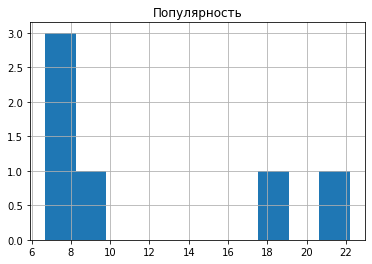

In [96]:
x = ['Java', 'Python', 'PHP', 'JavaScript', 'C#', 'C++']
popularity = [22.2, 17.6, 8.8, 8, 7.7, 6.7]
df = pd.DataFrame({
    'Язык': x,
    'Популярность': popularity
})
df.hist()